# 1. Import Dependencies

In [ ]:
!pip install opencv-python
#!pip install Cython>=0.29.12

In [18]:
# Import opencv
import cv2 

# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

# 2. Define Images to Collect

In [4]:
labels = ['mask', 'no-mask']
number_imgs = 5

# 3. Setup Folders 

In [ ]:
pwd

In [6]:
IMAGES_PATH = os.path.join('images', 'collectedimages')

In [89]:
print(IMAGES_PATH)

images\collectedimages


In [8]:
os.name

'nt'

In [9]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':      # for colab
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':         # for windows
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

# 4. Capture Images

In [12]:
for label in labels:
    #CONNECTS TO WEBCAM OR CAPTURE DEVICE
    cap = cv2.VideoCapture(0)     
    print('Collecting images for {}'.format(label))
    time.sleep(15)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(5)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

# 5. Image Labelling

### iNSTALLATION INSTRUCTION
### https://github.com/heartexlabs/labelImg

Windows + Anaconda

- Download and install Anaconda (Python 3+)
- Open the Anaconda Prompt and go to the 'labelImg' directory

- conda install pyqt=5
- conda install -c anaconda lxml
- pyrcc5 -o libs/resources.py resources.qrc
- python labelImg.py
- python labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

In [9]:
#!pip install --upgrade pyqt5 lxml

In [27]:
# give any path where you would like to install 'LabelImg'
#LABELIMG_PATH = os.path.join(os.getcwd(), 'labelimg')

In [ ]:
#LABELIMG_PATH

In [ ]:
# if not os.path.exists(LABELIMG_PATH):
#     !mkdir {LABELIMG_PATH}
#     !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [13]:
# if os.name == 'posix':
#     !make qt5py3
# if os.name =='nt':
#     !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
#!cd {LABELIMG_PATH} && python labelImg.py

# 6. Generate CSV 

In [120]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [121]:
for folder in ['collectedimages']:
    images_Folder_path = os.path.join(os.getcwd(), 'images/' + 'collectedimages')
    xml_df = xml_to_csv(images_Folder_path)
    xml_df.to_csv((images_Folder_path + '/' + '_labels.csv'), index=None)
    print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [122]:
#pwd

In [123]:
#os.path.join(os.getcwd(), 'images/' + 'collectedimages')

In [124]:
df = pd.read_csv(os.path.join(os.getcwd(), 'images', 'collectedimages', '_labels.csv'))
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,maksssksksss4.png,301,400,mask,59,145,188,322
1,maksssksksss522.png,267,400,no-mask,79,100,149,179
2,maksssksksss528.png,301,400,no-mask,32,117,157,304
3,maksssksksss530.png,301,400,no-mask,47,201,150,348
4,maksssksksss537.png,301,400,no-mask,80,123,203,294
...,...,...,...,...,...,...,...,...
207,self-mask-9.png,605,324,mask,224,2,405,263
208,self-no-mask-1.png,487,441,no-mask,199,39,348,240
209,self-no-mask-2.png,423,436,no-mask,230,68,378,237
210,self-no-mask-3.png,315,423,no-mask,128,52,275,245


In [125]:
df['class'].value_counts()

mask       106
no-mask    106
Name: class, dtype: int64

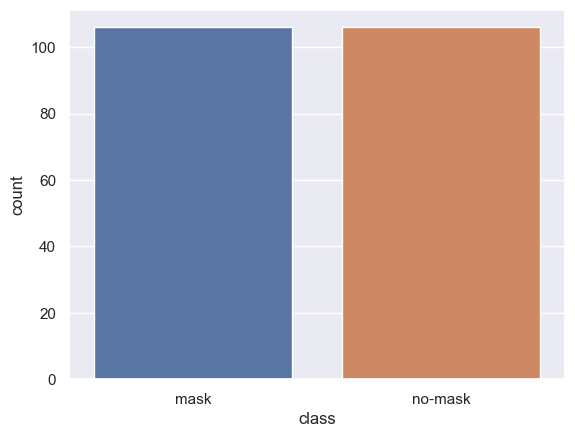

In [126]:
sns.set (style = 'darkgrid')
ax = sns.countplot(x = 'class', data = df)

# 7. Move them into a Training and Testing Partition

In [ ]:
IMAGES_PATH = os.path.join(os.getcwd(), 'images', 'collectedimages')
IMAGES_PATH

In [151]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#SETUP DIRECTORIES FOR TRAIN, TEST, VALIDATION
trainPath = os.path.join(IMAGES_PATH, 'train')
if not os.path.exists(trainPath):
    if os.name == 'posix':      # for colab
        !mkdir -p {trainPath}
    if os.name == 'nt':         # for windows
         !mkdir {trainPath}

# validation folder is same as source folder i.e. crsPath/IMAGES_PATH, later remaining images folder will be used for validation 
# and this will be renamed
#valPath = 'val' 

testPath = os.path.join(IMAGES_PATH, 'test')
if not os.path.exists(testPath):
    if os.name == 'posix':      # for colab
        !mkdir -p {testPath}
    if os.name == 'nt':         # for windows
         !mkdir {testPath}
            
crsPath = IMAGES_PATH #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
test_ratio = 0.2 # Use 0.1 if want to use setup validation forlder, so there will be some images left out


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2
#totalImgCount

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.xml'):
            xmls.append(filename)
        else:
            imgs.append(filename)
            

#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForTest = int(len(imgs)*test_ratio)


#cycle for train dir
for x in range(countForTrain):

    imagFile = choice(imgs) # get name of random image from origin dir
    fileXml = imagFile[:-4] +'.xml' # get name of corresponding annotation file

    #move both files into train dir
    shutil.move(os.path.join(crsPath, imagFile), os.path.join(trainPath, imagFile))
    shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainPath, fileXml))

    #remove files from arrays
    imgs.remove(imagFile)
    xmls.remove(fileXml)


#cycle for test dir   
for x in range(countForTest):

    imagFile = choice(imgs) # get name of random image from origin dir
    fileXml = imagFile[:-4] +'.xml' # get name of corresponding annotation file

    #move both files into train dir
    shutil.move(os.path.join(crsPath, imagFile), os.path.join(testPath, imagFile))
    shutil.move(os.path.join(crsPath, fileXml), os.path.join(testPath, fileXml))

    #remove files from arrays
    imgs.remove(imagFile)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)

#summary information after splitting
print('Total images: ', totalImgCount)
print('Images in train dir:', len(os.listdir(trainPath))/2)
print('Images in test dir:', len(os.listdir(testPath))/2)
#print('Images in validation dir:', len(os.listdir(valPath))/2)

Total images:  111.0
Images in train dir: 88.0
Images in test dir: 22.0


# 8. Compress them for Colab Training

In [152]:
import os

In [153]:
ARCHIVE_PATH = os.path.join('images', 'archive.tar.gz')
testPath = os.path.join(IMAGES_PATH, 'test')
trainPath = os.path.join(IMAGES_PATH, 'train')

In [155]:
!tar -czf {ARCHIVE_PATH} {testPath} {trainPath}

tar: Removing leading drive letter from member names
